# Test andes - Conastant PQ load change
```
Note: only constant PQ load can be directly changed

For example, if comment out load settings in line [20], GENROW w remain unchanged after modifying 'Ppf' of load

use 'Toggler' for ZIP load change
```


In [1]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post4.dev0+gae11a531
Pandapower version: 2.8.0


In [2]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_base/ieee14_base.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

In [3]:
# set load as constant load
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

# Turn on numba to accelerate TDS
ssa.config.numba

0

In [4]:
ssa.setup()
ssa.PFlow.run()

ssa.TDS.config.tf = 2.0
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

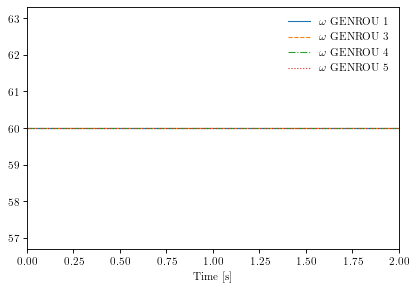

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [5]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

In [6]:
# get `Ppf` (load) on these buses before shedding

pq_p = ssa.PQ.get(src='Ppf', idx=['PQ_2','PQ_3'], attr='v')
pq_p

array([0.5  , 0.478])

In [7]:
ssa.PQ.set(src='Ppf', idx='PQ_2', attr='v', value=0.8)
ssa.PQ.Ppf.v

array([0.217, 0.8  , 0.478, 0.076, 0.15 , 0.295, 0.09 , 0.035, 0.061,
       0.135, 0.2  ])

  0%|          | 0/100 [00:00<?, ?%/s]

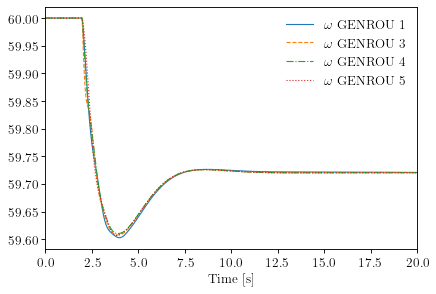

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [8]:
ssa.TDS.config.tf = 20

ssa.TDS.run()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )